In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/UCI_Credit_Card.csv')

In [3]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x=data.iloc[:,:-1]

In [6]:
x.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [7]:
y=data.iloc[:,-1:]

In [8]:
y.head(2)

,default.payment.next.month
0,1
1,1


In [9]:
x.shape

(30000, 24)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1221)

In [13]:
s=StandardScaler()

In [14]:
x_sc=s.fit_transform(x)

In [15]:
x_train_sc=s.fit_transform(x_train)

In [16]:
x_test_sc=s.transform(x_test)

In [17]:
import tensorflow

In [18]:
from tensorflow import keras

In [19]:
from keras import Sequential

In [20]:
from keras.layers import Dense

In [21]:
model=Sequential()
model.add(Dense(20,activation='relu',input_dim=24))
model.add(Dense(10,activation='relu',input_dim=20))
model.add(Dense(5,activation='relu',input_dim=10))
model.add(Dense(3,activation='relu',input_dim=5))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                500       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 787 (3.07 KB)
Trainable params: 787 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [24]:
history=model.fit(x_sc,y,epochs=10,batch_size=10,validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 7s 2ms/step - loss: 0.4771 - accuracy: 0.7857 - val_loss: 0.4392 - val_accuracy: 0.8280
Epoch 2/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4530 - accuracy: 0.8127 - val_loss: 0.4275 - val_accuracy: 0.8303
Epoch 3/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.4459 - accuracy: 0.8145 - val_loss: 0.4191 - val_accuracy: 0.8355
Epoch 4/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4417 - accuracy: 0.8163 - val_loss: 0.4201 - val_accuracy: 0.8320
Epoch 5/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.4384 - accuracy: 0.8159 - val_loss: 0.4148 - val_accuracy: 0.8330
Epoch 6/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4361 - accuracy: 0.8176 - val_loss: 0.4145 - val_accuracy: 0.8340
Epoch 7/10
2400/2400 [==============================] - 6s 2ms/step - loss: 0.4346 - accuracy: 0.8170 - val_loss: 0.4139 - val_accuracy:

In [25]:
import matplotlib.pyplot as pl

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

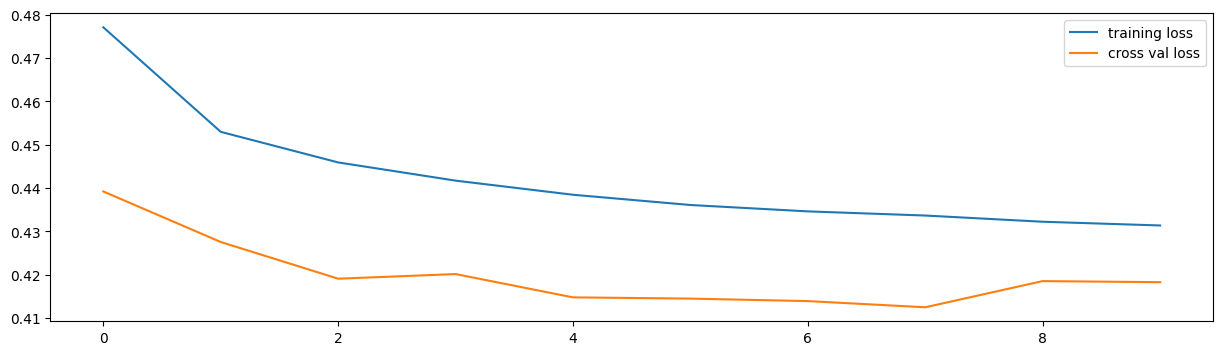

In [27]:
pl.figure(figsize=(15,4))
pl.plot(history.history['loss'],label='training loss')
pl.plot(history.history['val_loss'],label='cross val loss')
pl.legend()
pl.show()

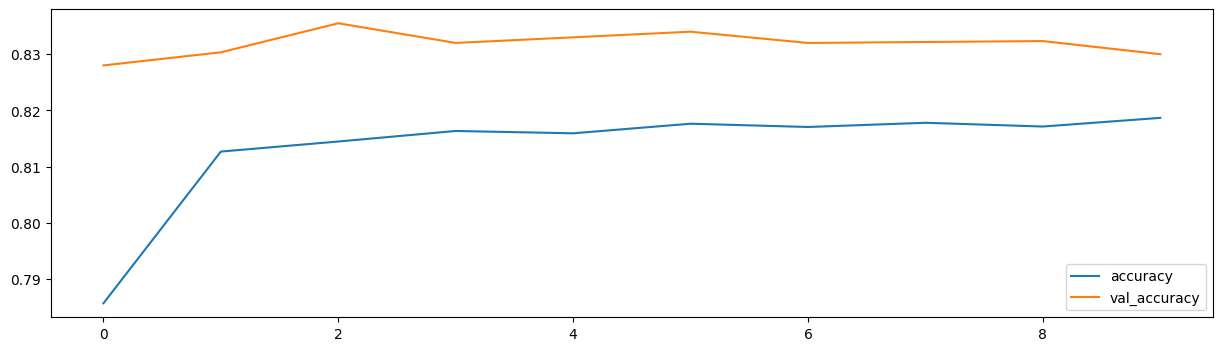

In [28]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],label='accuracy')
pl.plot(history.history['val_accuracy'],label='val_accuracy')
pl.legend()
pl.show()

In [29]:
p=model.predict(x_test_sc)

188/188 [==============================] - 0s 2ms/step


In [30]:
from sklearn.metrics import roc_auc_score,roc_curve

In [31]:
fpr,tpr,thr=roc_curve(y_test,p)

In [32]:
import numpy as np
accuracy=[]
for i in thr:
  y_prd=np.where(p>i,1,0)
  x=accuracy_score(y_test,y_prd)
  accuracy.append(x)
  d1=pd.DataFrame(thr,columns=["thresold"])
d2=pd.DataFrame(accuracy,columns=["accuracy_score"])
d=pd.concat([d1,d2],axis=1)
d.sort_values(by='accuracy_score',ascending=False).head(2)

,thresold,accuracy_score
221,0.477451,0.815667
220,0.479207,0.815500


In [33]:
m=d['thresold'][1]

In [34]:
m

0.6965924

In [35]:
p=np.where(p>m,1,0)

In [36]:
accuracy_score(y_test,p)

0.7753333333333333

In [37]:
from keras.callbacks import EarlyStopping

In [38]:
 z=EarlyStopping(monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0)

In [39]:
history=model.fit(x_sc,y,epochs=100,batch_size=100,validation_split=0.2,callbacks=z)

Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 0.4270 - accuracy: 0.8189 - val_loss: 0.4140 - val_accuracy: 0.8307
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.8200 - val_loss: 0.4136 - val_accuracy: 0.8318
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8194 - val_loss: 0.4138 - val_accuracy: 0.8323
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4244 - accuracy: 0.8204 - val_loss: 0.4137 - val_accuracy: 0.8322
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.8196 - val_loss: 0.4135 - val_accuracy: 0.8323
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4239 - accuracy: 0.8205 - val_loss: 0.4136 - val_accuracy: 0.8323


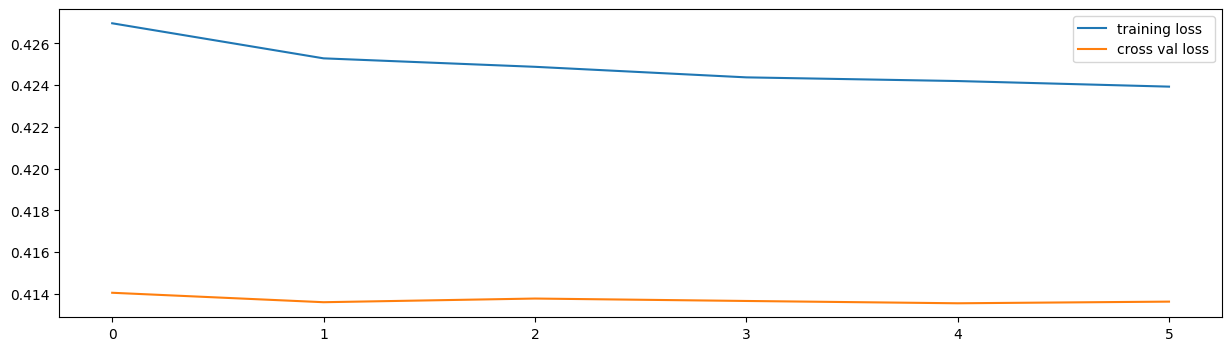

In [40]:
pl.figure(figsize=(15,4))
pl.plot(history.history['loss'],label='training loss')
pl.plot(history.history['val_loss'],label='cross val loss')
pl.legend()
pl.show()

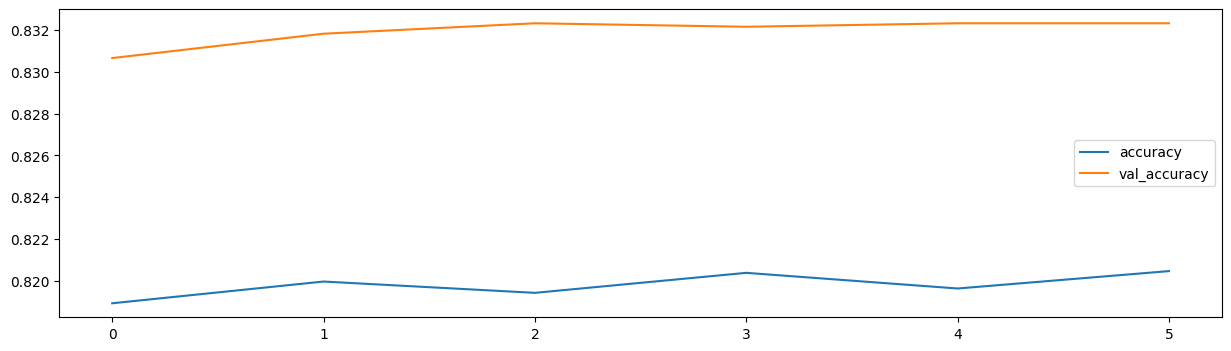

In [41]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],label='accuracy')
pl.plot(history.history['val_accuracy'],label='val_accuracy')
pl.legend()
pl.show()

In [42]:
from keras.layers import Dropout

In [43]:
model.add(Dense(20,activation='relu',input_dim=24))
model.add(Dropout(.4))
model.add(Dense(10,activation='relu',input_dim=20))
model.add(Dropout(.3))
model.add(Dense(5,activation='relu',input_dim=10))
model.add(Dropout(.2))
model.add(Dense(3,activation='relu',input_dim=5))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [45]:
history=model.fit(x_sc,y,epochs=100,batch_size=100,validation_split=0.2,callbacks=z)

Epoch 1/100
240/240 [==============================] - 4s 7ms/step - loss: 0.5790 - accuracy: 0.7759 - val_loss: 0.5205 - val_accuracy: 0.7890
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 0.5439 - accuracy: 0.7763 - val_loss: 0.5193 - val_accuracy: 0.7890
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 0.5355 - accuracy: 0.7763 - val_loss: 0.5164 - val_accuracy: 0.7890
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5349 - accuracy: 0.7763 - val_loss: 0.5169 - val_accuracy: 0.7890
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5341 - accuracy: 0.7763 - val_loss: 0.5170 - val_accuracy: 0.7890
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.5332 - accuracy: 0.7763 - val_loss: 0.5157 - val_accuracy: 0.7890
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.5328 - accuracy: 0.7763 - val_loss: 0.5162 - val_accuracy: 0.7890

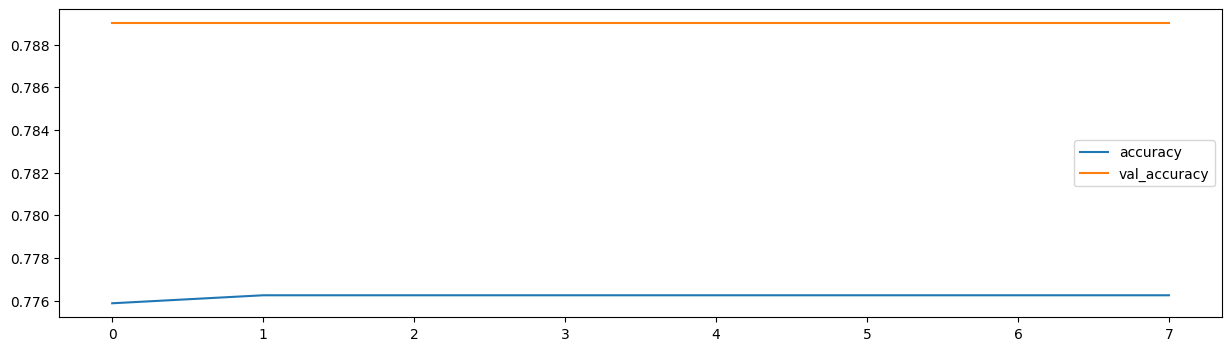

In [46]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],label='accuracy')
pl.plot(history.history['val_accuracy'],label='val_accuracy')
pl.legend()
pl.show()

In [47]:
from keras.regularizers import l2

In [48]:
model.add(Dense(20,activation='relu',input_dim=24,kernel_regularizer=l2(.01)))
model.add(Dropout(.4))
model.add(Dense(10,activation='relu',input_dim=20,kernel_regularizer=l2(.01)))
model.add(Dropout(.3))
model.add(Dense(5,activation='relu',input_dim=10,kernel_regularizer=l2(.01)))
model.add(Dropout(.2))
model.add(Dense(3,activation='relu',input_dim=5,kernel_regularizer=l2(.01)))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])
history=model.fit(x_sc,y,epochs=100,batch_size=100,validation_split=0.2,callbacks=z)

Epoch 1/100
240/240 [==============================] - 6s 10ms/step - loss: 0.7133 - accuracy: 0.7763 - val_loss: 0.5937 - val_accuracy: 0.7890
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5796 - accuracy: 0.7763 - val_loss: 0.5405 - val_accuracy: 0.7890
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5493 - accuracy: 0.7763 - val_loss: 0.5255 - val_accuracy: 0.7890
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5394 - accuracy: 0.7763 - val_loss: 0.5206 - val_accuracy: 0.7890
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5356 - accuracy: 0.7763 - val_loss: 0.5189 - val_accuracy: 0.7890
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5339 - accuracy: 0.7763 - val_loss: 0.5172 - val_accuracy: 0.7890
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.5327 - accuracy: 0.7763 - val_loss: 0.5171 - val_accuracy: 0.789

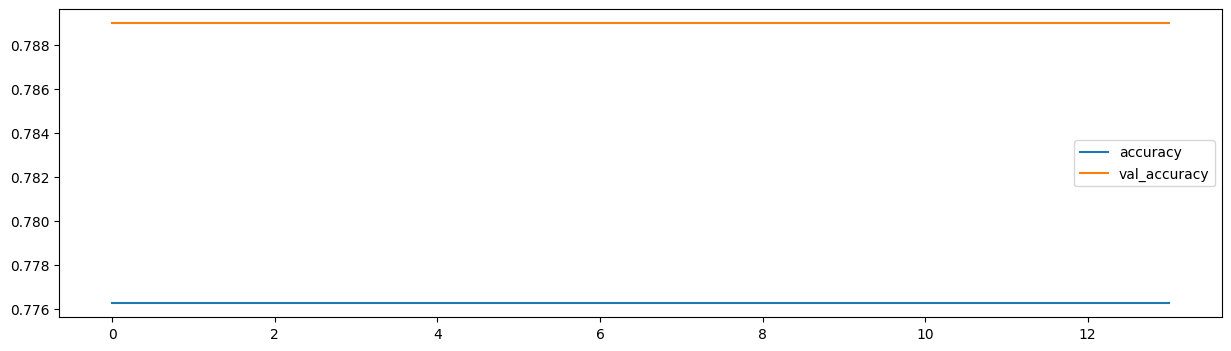

In [50]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],label='accuracy')
pl.plot(history.history['val_accuracy'],label='val_accuracy')
pl.legend()
pl.show()

In [51]:
model.add(Dense(20,activation='relu',input_dim=24,kernel_regularizer=l2(.001),
                kernel_initializer='glorot_normal'))
model.add(Dropout(.4))
model.add(Dense(10,activation='relu',input_dim=20,kernel_regularizer=l2(.001)))
model.add(Dropout(.3))
model.add(Dense(5,activation='relu',input_dim=10,kernel_regularizer=l2(.001)))
model.add(Dropout(.2))
model.add(Dense(3,activation='relu',input_dim=5))
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])
history=model.fit(x_sc,y,epochs=100,batch_size=100,validation_split=0.2,callbacks=z)

Epoch 1/100
240/240 [==============================] - 6s 7ms/step - loss: 0.5949 - accuracy: 0.7761 - val_loss: 0.5289 - val_accuracy: 0.7890
Epoch 2/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5505 - accuracy: 0.7763 - val_loss: 0.5236 - val_accuracy: 0.7890
Epoch 3/100
240/240 [==============================] - 2s 9ms/step - loss: 0.5425 - accuracy: 0.7763 - val_loss: 0.5208 - val_accuracy: 0.7890
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5391 - accuracy: 0.7763 - val_loss: 0.5198 - val_accuracy: 0.7890
Epoch 5/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5372 - accuracy: 0.7763 - val_loss: 0.5180 - val_accuracy: 0.7890
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5357 - accuracy: 0.7763 - val_loss: 0.5177 - val_accuracy: 0.7890
Epoch 7/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5340 - accuracy: 0.7763 - val_loss: 0.5173 - val_accuracy: 0.7890

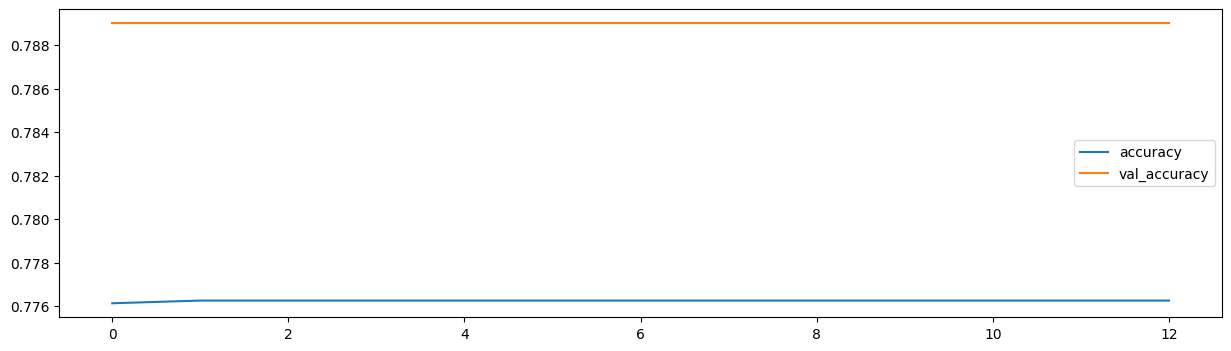

In [53]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],label='accuracy')
pl.plot(history.history['val_accuracy'],label='val_accuracy')
pl.legend()
pl.show()

In [54]:
model.add(Dense(20,activation='relu',input_dim=24,kernel_regularizer=l2(.01),
                kernel_initializer='glorot_uniform'))
model.add(Dropout(.4))
model.add(Dense(10,activation='relu',input_dim=20,kernel_regularizer=l2(.01)))
model.add(Dropout(.3))
model.add(Dense(5,activation='relu',input_dim=10,kernel_regularizer=l2(.01)))
model.add(Dropout(.2))
model.add(Dense(3,activation='relu',input_dim=5,kernel_regularizer=l2(.01)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])
history=model.fit(x_sc,y,epochs=100,batch_size=100,validation_split=0.2,callbacks=z)

Epoch 1/100
240/240 [==============================] - 8s 10ms/step - loss: 0.7517 - accuracy: 0.7753 - val_loss: 0.6067 - val_accuracy: 0.7890
Epoch 2/100
240/240 [==============================] - 2s 7ms/step - loss: 0.5918 - accuracy: 0.7763 - val_loss: 0.5458 - val_accuracy: 0.7890
Epoch 3/100
240/240 [==============================] - 2s 10ms/step - loss: 0.5544 - accuracy: 0.7763 - val_loss: 0.5299 - val_accuracy: 0.7890
Epoch 4/100
240/240 [==============================] - 2s 7ms/step - loss: 0.5418 - accuracy: 0.7763 - val_loss: 0.5218 - val_accuracy: 0.7890
Epoch 5/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5372 - accuracy: 0.7763 - val_loss: 0.5192 - val_accuracy: 0.7890
Epoch 6/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5344 - accuracy: 0.7763 - val_loss: 0.5174 - val_accuracy: 0.7890
Epoch 7/100
240/240 [==============================] - 2s 6ms/step - loss: 0.5327 - accuracy: 0.7763 - val_loss: 0.5168 - val_accuracy: 0.78

In [55]:
from keras.layers import BatchNormalization

In [56]:
model.add(Dense(20,activation='relu',input_dim=24))
model.add(BatchNormalization())

model.add(Dense(10,activation='relu',input_dim=20))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(5,activation='relu',input_dim=10))
model.add(BatchNormalization())

model.add(Dense(3,activation='relu',input_dim=5))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])
history=model.fit(x_sc,y,epochs=100,batch_size=100,validation_split=0.2,callbacks=z)

Epoch 1/100
240/240 [==============================] - 12s 17ms/step - loss: 0.6965 - accuracy: 0.6502 - val_loss: 0.5654 - val_accuracy: 0.7890
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 0.5608 - accuracy: 0.7629 - val_loss: 0.5229 - val_accuracy: 0.7890
Epoch 3/100
240/240 [==============================] - 2s 9ms/step - loss: 0.5367 - accuracy: 0.7761 - val_loss: 0.5163 - val_accuracy: 0.7890
Epoch 4/100
240/240 [==============================] - 2s 8ms/step - loss: 0.5334 - accuracy: 0.7763 - val_loss: 0.5162 - val_accuracy: 0.7890
Epoch 5/100
240/240 [==============================] - 2s 7ms/step - loss: 0.5335 - accuracy: 0.7763 - val_loss: 0.6920 - val_accuracy: 0.7890
Epoch 6/100
240/240 [==============================] - 2s 9ms/step - loss: 0.5324 - accuracy: 0.7763 - val_loss: 0.5159 - val_accuracy: 0.7890
Epoch 7/100
240/240 [==============================] - 3s 12ms/step - loss: 0.5332 - accuracy: 0.7763 - val_loss: 0.5232 - val_accuracy: 0.7

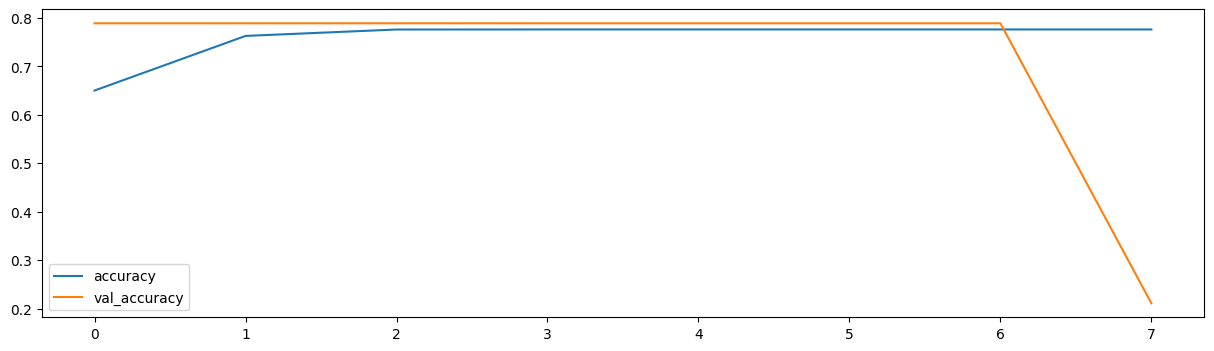

In [58]:
pl.figure(figsize=(15,4))
pl.plot(history.history['accuracy'],label='accuracy')
pl.plot(history.history['val_accuracy'],label='val_accuracy')
pl.legend()
pl.show()

In [59]:
#hyper paramter tuning

In [60]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


In [61]:
import optuna

In [62]:
import optuna
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.initializers import he_normal, glorot_normal, lecun_normal

In [63]:
from keras.activations import swish,elu,selu

In [64]:
from keras.layers import PReLU

In [65]:
from keras.layers import LeakyReLU

In [66]:
from tensorflow.nn import softmax

In [67]:
from tensorflow.keras.initializers import he_normal, glorot_uniform,he_uniform,glorot_normal,lecun_normal,lecun_uniform

In [68]:
from tensorflow.keras.optimizers import Nadam #combination of adam and sgd

In [69]:
from keras.regularizers import l2,l1,l1_l2

In [70]:
def create_model(trial):
    model = Sequential()
    n_layers = trial.suggest_int('n_layers', 1,5)
    for i in range(n_layers):
        node=trial.suggest_int(f'node number in layer {i}',16, 128)
        initializer=trial.suggest_categorical(f'initialization in layer {i} :',['he_normal',
                'glorot_uniform','he_uniform','glorot_normal','lecun_normal','lecun_uniform'])
        activation=trial.suggest_categorical(f'activation in layer {i}', ['relu', 'tanh', 'sigmoid',
                                              'softmax','swish','elu','selu','PReLU','LeakyReLU'])
        regularization=trial.suggest_categorical('regularization',['l2','l1','l1_l2'])
        reg_rate = trial.suggest_float(f'reg rate in layer {i}', 0.0001, 0.5,log=True)
        if regularization=='l2':
          m=l2(reg_rate)
        elif regularization=='l1':
          m=l1(reg_rate)
        else:
          m=l1_l2(reg_rate)
        if i==0:
         model.add(Dense(node,activation=activation,kernel_initializer=initializer,kernel_regularizer=m,
                         input_dim=24))
        else:
          model.add(Dense(node,kernel_initializer=initializer,activation=activation,kernel_regularizer=m))
        v=trial.suggest_categorical(f'batch_norm in layer {i}', [True, False])
        if v==True:
            model.add(BatchNormalization())
        dropout_rate = trial.suggest_float(f'dropout in layer {i}', 0.0, 0.5)
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer_options = {'adam': Adam,
        'rmsprop': RMSprop,
        'sgd': SGD,
        'Nadam':Nadam }
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd','Nadam'])
    learning_rate = trial.suggest_float('learning_rate', .00001,.1, log=True)
    optimizer = optimizer_options[optimizer_name](learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [71]:
def objective(trial):
    model = create_model(trial)
    batch_size = trial.suggest_int('batch_size',16, 128)
    e = trial.suggest_int('epochs',10,250)
    history = model.fit(x_train_sc, y_train, validation_data=(x_test_sc,y_test),
                        epochs=e, batch_size=batch_size,callbacks=z)

    # Evaluate the model
    y_pred = model.predict(x_test_sc)
    fpr,tpr,thr=roc_curve(y_test,y_pred)
    accuracy=[]
    for i in thr:
     y_prd=np.where(p>i,1,0)
     x=accuracy_score(y_test,y_prd)
     accuracy.append(x)
     d1=pd.DataFrame(thr,columns=["thresold"])
     d2=pd.DataFrame(accuracy,columns=["accuracy_score"])
     d=pd.concat([d1,d2],axis=1)
     d.sort_values(by='accuracy_score',ascending=False).head(2)
     m=d['thresold'][1]
     y_pred=np.where(p>m,1,0)
     accuracy = accuracy_score(y_test,y_pred)
     return accuracy

In [72]:
study = optuna.create_study(direction='maximize')

[I 2024-07-15 21:53:10,182] A new study created in memory with name: no-name-ab875ebf-419d-46f3-ba65-31b8edcd9069


In [73]:
study.optimize(objective, n_trials=3)

Epoch 1/148
572/572 [==============================] - 8s 11ms/step - loss: 12.0185 - accuracy: 0.7788 - val_loss: 7.4544 - val_accuracy: 0.7753
Epoch 2/148
572/572 [==============================] - 7s 12ms/step - loss: 7.4920 - accuracy: 0.7797 - val_loss: 7.4667 - val_accuracy: 0.7753
Epoch 3/148
572/572 [==============================] - 7s 12ms/step - loss: 7.4919 - accuracy: 0.7797 - val_loss: 7.4759 - val_accuracy: 0.7753
Epoch 4/148
572/572 [==============================] - 7s 12ms/step - loss: 7.4918 - accuracy: 0.7797 - val_loss: 7.4800 - val_accuracy: 0.7753
Epoch 5/148
572/572 [==============================] - 5s 9ms/step - loss: 7.4910 - accuracy: 0.7797 - val_loss: 7.4876 - val_accuracy: 0.7753
Epoch 6/148
188/188 [==============================] - 1s 2ms/step


[I 2024-07-15 21:53:53,379] Trial 0 finished with value: 0.7753333333333333 and parameters: {'n_layers': 5, 'node number in layer 0': 93, 'initialization in layer 0 :': 'glorot_uniform', 'activation in layer 0': 'LeakyReLU', 'regularization': 'l1_l2', 'reg rate in layer 0': 0.00013335266560689373, 'batch_norm in layer 0': False, 'dropout in layer 0': 0.38280585835168557, 'node number in layer 1': 120, 'initialization in layer 1 :': 'glorot_uniform', 'activation in layer 1': 'sigmoid', 'reg rate in layer 1': 0.18461655280245245, 'batch_norm in layer 1': False, 'dropout in layer 1': 0.123727170479284, 'node number in layer 2': 126, 'initialization in layer 2 :': 'he_uniform', 'activation in layer 2': 'relu', 'reg rate in layer 2': 0.003612348934836399, 'batch_norm in layer 2': True, 'dropout in layer 2': 0.04109136157076915, 'node number in layer 3': 122, 'initialization in layer 3 :': 'glorot_uniform', 'activation in layer 3': 'PReLU', 'reg rate in layer 3': 0.08728122761786171, 'batch_

Epoch 1/89
250/250 [==============================] - 2s 5ms/step - loss: 38.4143 - accuracy: 0.6276 - val_loss: 38.2587 - val_accuracy: 0.7647
Epoch 2/89
250/250 [==============================] - 1s 4ms/step - loss: 38.1730 - accuracy: 0.6600 - val_loss: 38.0171 - val_accuracy: 0.7692
Epoch 3/89
250/250 [==============================] - 1s 3ms/step - loss: 37.9329 - accuracy: 0.6918 - val_loss: 37.7840 - val_accuracy: 0.7725
Epoch 4/89
250/250 [==============================] - 1s 3ms/step - loss: 37.7020 - accuracy: 0.7130 - val_loss: 37.5557 - val_accuracy: 0.7740
Epoch 5/89
250/250 [==============================] - 1s 4ms/step - loss: 37.4751 - accuracy: 0.7260 - val_loss: 37.3306 - val_accuracy: 0.7742
Epoch 6/89
250/250 [==============================] - 1s 3ms/step - loss: 37.2435 - accuracy: 0.7403 - val_loss: 37.1083 - val_accuracy: 0.7747
Epoch 7/89
250/250 [==============================] - 1s 3ms/step - loss: 37.0228 - accuracy: 0.7477 - val_loss: 36.8874 - val_accuracy:

[I 2024-07-15 21:55:15,508] Trial 1 finished with value: 0.7753333333333333 and parameters: {'n_layers': 3, 'node number in layer 0': 116, 'initialization in layer 0 :': 'he_normal', 'activation in layer 0': 'relu', 'regularization': 'l1_l2', 'reg rate in layer 0': 0.026465374054720936, 'batch_norm in layer 0': False, 'dropout in layer 0': 0.4764588173564365, 'node number in layer 1': 19, 'initialization in layer 1 :': 'lecun_normal', 'activation in layer 1': 'relu', 'reg rate in layer 1': 0.028015662564647215, 'batch_norm in layer 1': True, 'dropout in layer 1': 0.36766498469387726, 'node number in layer 2': 120, 'initialization in layer 2 :': 'glorot_uniform', 'activation in layer 2': 'sigmoid', 'reg rate in layer 2': 0.05483677202575504, 'batch_norm in layer 2': False, 'dropout in layer 2': 0.28490784578839456, 'optimizer': 'sgd', 'learning_rate': 7.369333297083373e-05, 'batch_size': 96, 'epochs': 89}. Best is trial 0 with value: 0.7753333333333333.


Epoch 1/205
534/534 [==============================] - 2s 3ms/step - loss: 2.7867 - accuracy: 0.7603 - val_loss: 0.4957 - val_accuracy: 0.7887
Epoch 2/205
534/534 [==============================] - 1s 3ms/step - loss: 0.4916 - accuracy: 0.7936 - val_loss: 0.4943 - val_accuracy: 0.7975
Epoch 3/205
534/534 [==============================] - 1s 2ms/step - loss: 0.4878 - accuracy: 0.7982 - val_loss: 0.4857 - val_accuracy: 0.7925
Epoch 4/205
534/534 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.8016 - val_loss: 0.4878 - val_accuracy: 0.7935
Epoch 5/205
534/534 [==============================] - 3s 5ms/step - loss: 0.4819 - accuracy: 0.8032 - val_loss: 0.4846 - val_accuracy: 0.7968
Epoch 6/205
534/534 [==============================] - 2s 3ms/step - loss: 0.4798 - accuracy: 0.8035 - val_loss: 0.4783 - val_accuracy: 0.7983
Epoch 7/205
534/534 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.8037 - val_loss: 0.4778 - val_accuracy: 0.8052

[I 2024-07-15 21:55:42,293] Trial 2 finished with value: 0.7753333333333333 and parameters: {'n_layers': 1, 'node number in layer 0': 68, 'initialization in layer 0 :': 'glorot_normal', 'activation in layer 0': 'PReLU', 'regularization': 'l2', 'reg rate in layer 0': 0.3637653652607425, 'batch_norm in layer 0': False, 'dropout in layer 0': 0.47805828804724115, 'optimizer': 'rmsprop', 'learning_rate': 0.0006849100602729354, 'batch_size': 45, 'epochs': 205}. Best is trial 0 with value: 0.7753333333333333.


In [112]:
b=study.best_trial

In [113]:
b

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.7753333333333333], datetime_start=datetime.datetime(2024, 7, 15, 21, 53, 10, 195509), datetime_complete=datetime.datetime(2024, 7, 15, 21, 53, 53, 378151), params={'n_layers': 5, 'node number in layer 0': 93, 'initialization in layer 0 :': 'glorot_uniform', 'activation in layer 0': 'LeakyReLU', 'regularization': 'l1_l2', 'reg rate in layer 0': 0.00013335266560689373, 'batch_norm in layer 0': False, 'dropout in layer 0': 0.38280585835168557, 'node number in layer 1': 120, 'initialization in layer 1 :': 'glorot_uniform', 'activation in layer 1': 'sigmoid', 'reg rate in layer 1': 0.18461655280245245, 'batch_norm in layer 1': False, 'dropout in layer 1': 0.123727170479284, 'node number in layer 2': 126, 'initialization in layer 2 :': 'he_uniform', 'activation in layer 2': 'relu', 'reg rate in layer 2': 0.003612348934836399, 'batch_norm in layer 2': True, 'dropout in layer 2': 0.04109136157076915, 'node number in layer 3': 122, 'ini

In [114]:
def create_model(b):
    model = Sequential()
    n_layers = b.suggest_int('n_layers', 1,5)
    for i in range(n_layers):
        node=b.suggest_int(f'node number in layer {i}',16, 128)
        initializer=b.suggest_categorical(f'initialization in layer {i} :',['he_normal',
                'glorot_uniform','he_uniform','glorot_normal','lecun_normal','lecun_uniform'])
        activation=b.suggest_categorical(f'activation in layer {i}', ['relu', 'tanh', 'sigmoid',
                                              'softmax','swish','elu','selu','PReLU','LeakyReLU'])
        regularization=b.suggest_categorical('regularization',['l2','l1','l1_l2'])
        reg_rate =b.suggest_float(f'reg rate in layer {i}', 0.0001, 0.5,log=True)
        if regularization=='l2':
          m=l2(reg_rate)
        elif regularization=='l1':
          m=l1(reg_rate)
        else:
          m=l1_l2(reg_rate)
        if i==0:
         model.add(Dense(node,activation=activation,kernel_initializer=initializer,kernel_regularizer=m,
                         input_dim=24))
        else:
          model.add(Dense(node,kernel_initializer=initializer,activation=activation,kernel_regularizer=m))
        v=b.suggest_categorical(f'batch_norm in layer {i}', [True, False])
        if v==True:
            model.add(BatchNormalization())
        dropout_rate =b.suggest_float(f'dropout in layer {i}', 0.0, 0.5)
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer_options = {'adam': Adam,
        'rmsprop': RMSprop,
        'sgd': SGD,
        'Nadam':Nadam }
    optimizer_name =b.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd','Nadam'])
    learning_rate =b.suggest_float('learning_rate', .00001,.1, log=True)
    optimizer = optimizer_options[optimizer_name](learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [116]:
best_model = create_model(b)

In [117]:
best_model.fit(x_train_sc, y_train, epochs=b.params['epochs'],
               validation_data=(x_test_sc, y_test),
               batch_size=b.params['batch_size'], callbacks=z)

Epoch 1/148
572/572 [==============================] - 6s 6ms/step - loss: 11.9574 - accuracy: 0.7791 - val_loss: 7.4509 - val_accuracy: 0.7753
Epoch 2/148
572/572 [==============================] - 3s 5ms/step - loss: 7.4925 - accuracy: 0.7797 - val_loss: 7.4620 - val_accuracy: 0.7753
Epoch 3/148
572/572 [==============================] - 4s 7ms/step - loss: 7.4925 - accuracy: 0.7797 - val_loss: 7.4706 - val_accuracy: 0.7753
Epoch 4/148
572/572 [==============================] - 3s 5ms/step - loss: 7.4919 - accuracy: 0.7797 - val_loss: 7.4779 - val_accuracy: 0.7753
Epoch 5/148
572/572 [==============================] - 3s 5ms/step - loss: 7.4917 - accuracy: 0.7797 - val_loss: 7.4808 - val_accuracy: 0.7753
Epoch 6/148
572/572 [==============================] - 3s 5ms/step - loss: 7.4916 - accuracy: 0.7797 - val_loss: 7.4843 - val_accuracy: 0.7753


In [118]:
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 93)                2325      
                                                                 
 dropout_22 (Dropout)        (None, 93)                0         
                                                                 
 dense_43 (Dense)            (None, 120)               11280     
                                                                 
 dropout_23 (Dropout)        (None, 120)               0         
                                                                 
 dense_44 (Dense)            (None, 126)               15246     
                                                                 
 batch_normalization_6 (Bat  (None, 126)               504       
 chNormalization)                                                
                                                      

In [119]:
best_model.evaluate(x_test_sc,y_test)

188/188 [==============================] - 1s 5ms/step - loss: 7.4509 - accuracy: 0.7753


[7.450925827026367, 0.7753333449363708]